## Outlier Detection using Supervised Machine Learning 

Outlier detection is not straightforward, mainly due to the ambiguity surrounding the definition of what an outlier is specific to our data or the problem that we are trying to solve. Having domain knowledge is vital to making the proper judgment when spotting outliers. 

Most of the ML methods techniques for outlier detection are considered unsupervised outlier detection methods, such as **Isolation Forests (iForest), unsupervised K-Nearest Neighbors (KNN), Local Outlier Factor (LOF) and Copula-Based Outlier Detection (COPOD)** 

Generally, outliers (or anomalies) are considered a rare occurrence. In other words, we would assume a small fraction of our data are outliers in a large data set. For example, 1% of the data may be potential outliers. However, this complexity requires methods designed to find patterns in the data. Unsupervised outlier detection techniques are great at finding patterns in rare occurrences. 

After investigating outliers, we will have a historical set of labeled data, allowing us to leverage semi-supervised outlire detection techniques.

Here we will introduce the **PyOD** library, described as "a comprehensive and scalable Python toolkit for detecting outlying objects in multivariate data". 

In [1]:
import pyod 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pathlib import Path 
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [16,3]


In [3]:
# load the nyc taxi dataset 
file = Path("../TimeSeriesAnalysisWithPythonCookbook/Data/nyc_taxi.csv")
nyc_taxi = pd.read_csv(file, index_col='timestamp', parse_dates=True)
nyc_taxi.index.freq = "30T"

In [4]:
# Store the known dates containing outliers, also known as ground truth labels

nyc_dates = [
    "2014-11-01",
    "2014-11-27",
    "2014-12-25",
    "2015-01-01",
    "2015-01-27"
]


In [5]:
# Create the plot_outliers function that we will use throughout 

def plot_outliers(outliers, data, method='KNN', 
                  halignment = 'right', 
                  valignment = 'top', 
                  labels=False):
    ax = data.plot(alpha=0.6)

    if labels:
        for i in outliers['value'].items():
            plt.plot(i[0], i[1], 'v', markersize=8, markerfacecolor='none', markeredgecolor='k')
            plt.text(i[0], i[1]-(i[1]*0.04), f'{i[0].strftime("%m/%d")}', 
                     horizontalalignment=halignment, 
                     verticalalignment=valignment)
    
    else:
        data.loc[outliers.index].plot(ax=ax, style='rX', markersize=9)
    
    plt.title(f'NYC Taxi - {method}')
    plt.xlabel('date')
    plt.ylabel('# of passengers')
    plt.legend(['nyc taxi', 'outliers'])
    plt.show()

As we proceed the goal is to see how the different techniques capture outliers and compare them to the ground truth labels

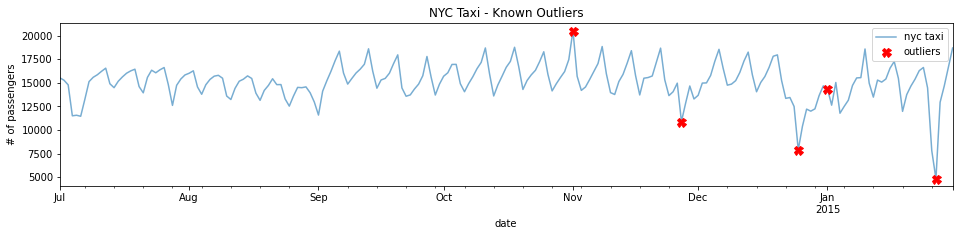

In [6]:
# Creates plot with known outliers marked with red x markers for the known outliers

tx = nyc_taxi.resample('D').mean()
known_outliers = tx.loc[nyc_dates]
plot_outliers(known_outliers, tx, 'Known Outliers')

Like scikit-learn, PyOD offers familiar methods for training our model and making predictions by providing three methods: model.fit(), model.predict() and model.fit_predict()

In addition to the predict method, PyOD provides two additional methods: predict_proba and predict_confidence

## Detecting outliers using KNN 

The KNN algorithm is typically used in a supervised learning setting where prior results or outcomes are known

It can be used to solve classification or regression problems. The idea is simple; we can classifiy a new data point, Y, based on its nearest neighbours. If k=5, the algorithm will find the five nearest data potins by distance to the point Y and determine its class based on the majority. If there are three blue and two red neighbors, Y is classified as blue. The K in KNN is a parameter we can modify to find the optimal value

In the case of outlier detection, the algorithm is used differently. Since we do not know the outliers in advance, KNN is used in an unsupervised learning manner. In this scenario, the algorithm finds the closest K nearest neighbors for every data point and measures the average distance. The points with the most significant distance from the population will be considered outliers, and more specifically, they are considered global outliers. In this case, the distance becomes the score to determine which points are outliers among the population, and hence KNN is a proximity-based algorithm

Generally, proximity-based algortihms rely on the distance or proximity between an outlier point and its nearest neighbors. In KNN, the number of nearest neighbors, k, is a parameter we need to determine. There are other variants of the KNN algorithm supported by PyOD, for example, Average KNN (AvgKNN) which uses the average distance to the KNN for scoring, and median KNN (medKNN) which uses the median distance for scoring. 